In [1]:
%pip install -q yfinance mplfinance seaborn plotly
%pip install -q --upgrade nbformat

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import mplfinance as mpf
import seaborn as sns
import plotly.graph_objects as go


In [3]:
# Download historical stock data
ticker = 'AAPL'  # Example stock symbol
stock_data = yf.download(ticker, start='2020-01-01', end='2023-01-01')

# Display the first few rows of the data
print(stock_data.head())


[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2020-01-02  74.059998  75.150002  73.797501  75.087502  72.876114  135480400
2020-01-03  74.287498  75.144997  74.125000  74.357498  72.167595  146322800
2020-01-06  73.447502  74.989998  73.187500  74.949997  72.742638  118387200
2020-01-07  74.959999  75.224998  74.370003  74.597504  72.400551  108872000
2020-01-08  74.290001  76.110001  74.290001  75.797501  73.565216  132079200


In [4]:
# Summary statistics
summary_stats = stock_data.describe()
print(summary_stats)


             Open        High         Low       Close   Adj Close  \
count  756.000000  756.000000  756.000000  756.000000  756.000000   
mean   130.231998  131.892775  128.614983  130.311812  128.081748   
std     30.596429   30.841435   30.287325   30.566496   30.528398   
min     57.020000   57.125000   53.152500   56.092499   54.569725   
25%    115.924374  117.275000  114.129997  115.739374  113.105711   
50%    135.794998  137.200005  133.750000  135.379997  133.478325   
75%    150.259998  151.902504  149.029995  150.704998  148.742523   
max    182.630005  182.940002  179.119995  182.009995  179.273590   

             Volume  
count  7.560000e+02  
mean   1.120920e+08  
std    5.602586e+07  
min    3.519590e+07  
25%    7.636470e+07  
50%    9.493580e+07  
75%    1.296327e+08  
max    4.265100e+08  


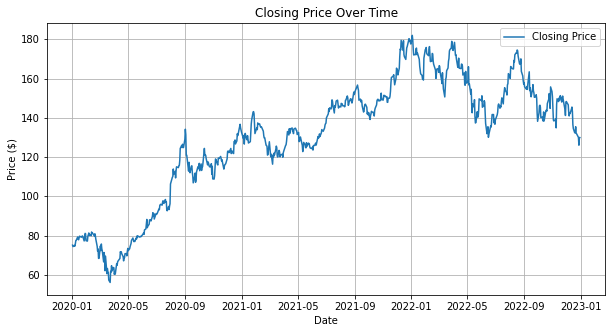

In [5]:
# Line plot of closing prices
plt.figure(figsize=(10, 5))
plt.plot(stock_data['Close'], label='Closing Price')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.title('Closing Price Over Time')
plt.legend()
plt.grid(True)
plt.show()


c:\python\lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


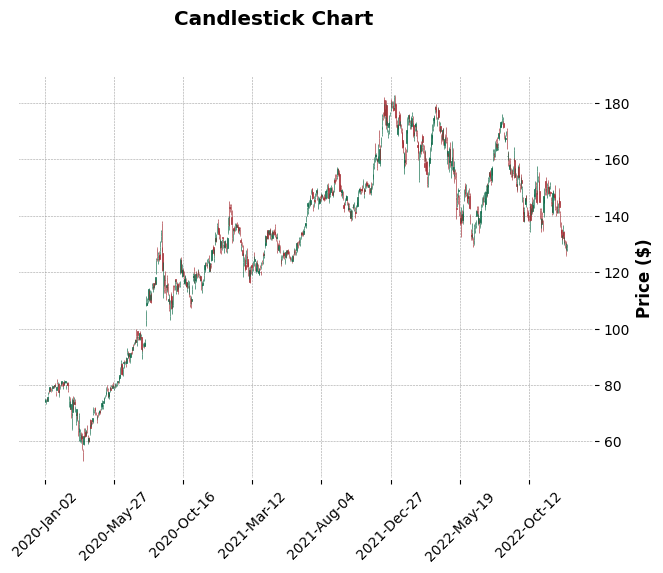

In [6]:
# Candlestick chart using mplfinance
mpf.plot(stock_data, type='candle', style='charles', title='Candlestick Chart', ylabel='Price ($)')


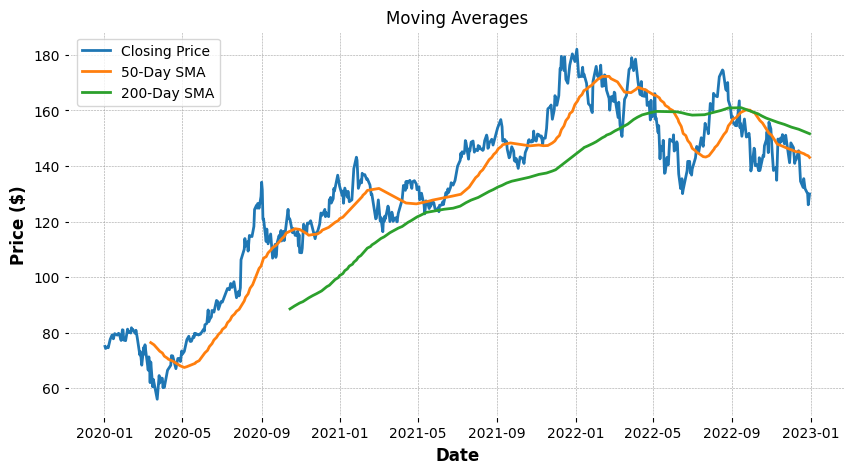

In [7]:
# Calculate moving averages
stock_data['SMA50'] = stock_data['Close'].rolling(window=50).mean()
stock_data['SMA200'] = stock_data['Close'].rolling(window=200).mean()

# Plot moving averages
plt.figure(figsize=(10, 5))
plt.plot(stock_data['Close'], label='Closing Price')
plt.plot(stock_data['SMA50'], label='50-Day SMA')
plt.plot(stock_data['SMA200'], label='200-Day SMA')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.title('Moving Averages')
plt.legend()
plt.grid(True)
plt.show()


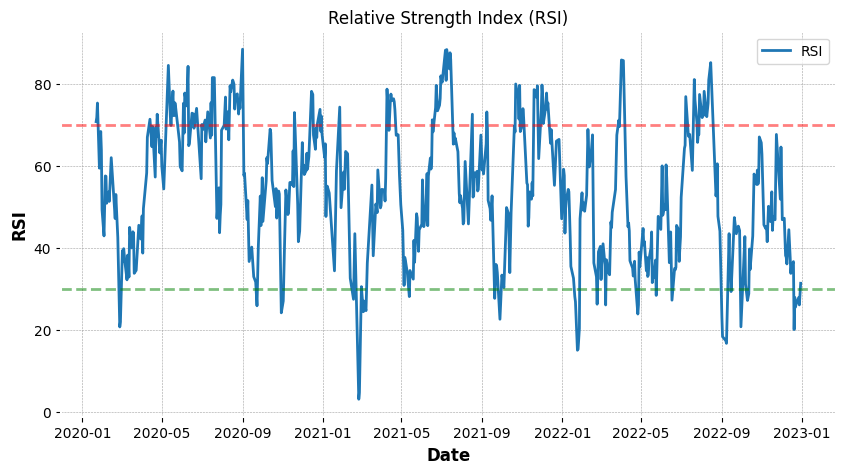

In [8]:
# Calculate RSI
delta = stock_data['Close'].diff(1)
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
stock_data['RSI'] = 100 - (100 / (1 + rs))

# Plot RSI
plt.figure(figsize=(10, 5))
plt.plot(stock_data['RSI'], label='RSI')
plt.axhline(70, linestyle='--', alpha=0.5, color='red')
plt.axhline(30, linestyle='--', alpha=0.5, color='green')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.title('Relative Strength Index (RSI)')
plt.legend()
plt.grid(True)
plt.show()


In [9]:
import plotly.graph_objects as go

# Interactive line plot with Plotly
fig = go.Figure()
fig.add_trace(go.Scatter(x=stock_data.index, y=stock_data['Close'], mode='lines', name='Closing Price'))
fig.update_layout(title='Interactive Stock Price Chart', xaxis_title='Date', yaxis_title='Price ($)')
fig.show()


[*********************100%%**********************]  5 of 5 completed


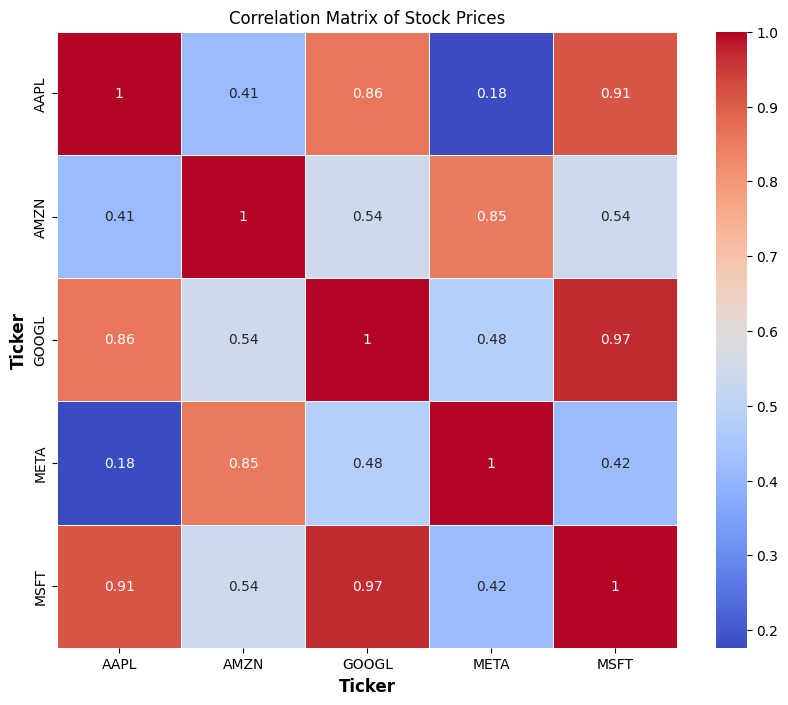

In [11]:
# Update the stock symbols
stocks = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META']

# Download stock data for multiple companies
stock_data = yf.download(stocks, start='2020-01-01', end='2023-01-01')['Close']

# Calculate correlation matrix
correlation_matrix = stock_data.corr()

# Heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Stock Prices')
plt.show()
